In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis

In [2]:

from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name='Layer 1 - medium dense sand',
            top=0,
            bottom=-20,
            weight=18,
            lateral_model= API_sand(phi=33, Neq=100)
        ),
        Layer(
            name='Layer 2 - Firm clay',
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model= API_clay(Su=[50, 70], eps50=0.015, Neq=100)
        ),
    ]
)

print(sp)

Layer 1
------------------------------
Name: Layer 1 - medium dense sand
Elevation: (0.0) - (-20.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 33.0°
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer 2
------------------------------
Name: Layer 2 - Firm clay
Elevation: (-20.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 50.0-70.0 kPa
	eps50 = 0.015
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [3]:
# Create Model 
M = Model.create(name="", pile=p, soil=sp)

# create point load
M.set_support(elevation=-30, Tx = True)
# M.set_support(elevation=0, Rz = True)
# M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0,Px=-20000, Py = 10e3)


NameError: name 'p' is not defined

In [ ]:
result = simple_winkler_analysis(model=M)

Converged at iteration no. 2


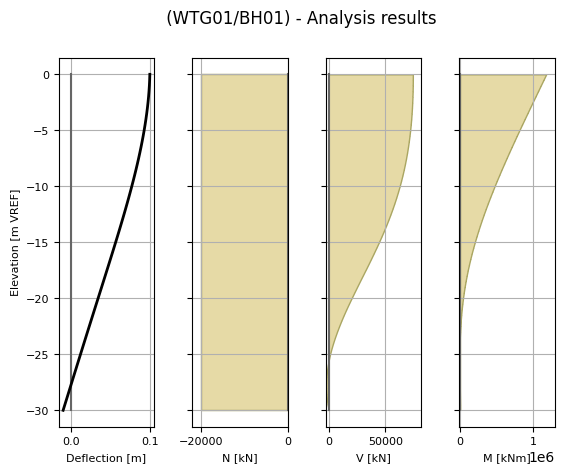

In [ ]:
result.plot()

In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay
    
# Create a layer
layer1 = Layer(name='Soft Clay',
               top=0,
               bottom=-10,
               weight=18,
               lateral_model=API_clay(Su=[30,35], eps50=[0.01, 0.02], Neq=100), )

print(layer1)

Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	Cyclic, N = 100 cycles
Axial model: None


In [ ]:
M.global_restrained

,x [m],y [m],Tx,Ty,Rz
Node no.,,,,,
0,0.0,0.0,False,True,True
1,-0.5,0.0,False,False,False
2,-1.0,0.0,False,False,False
3,-1.5,0.0,False,False,False
4,-2.0,0.0,False,False,False
...,...,...,...,...,...
56,-28.0,0.0,False,False,False
57,-28.5,0.0,False,False,False
58,-29.0,0.0,False,False,False


Text(0.5, 0, 'y [m]')

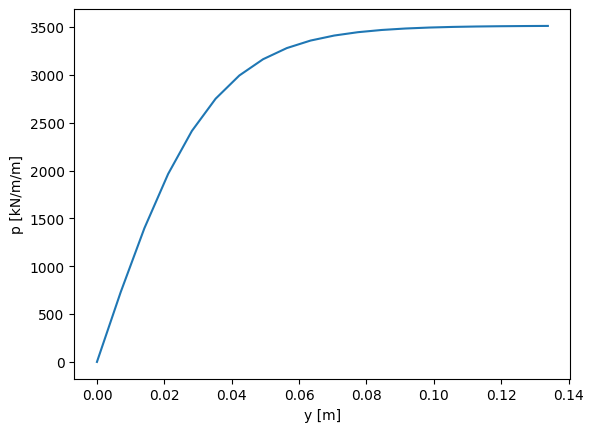

In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(sig=50, # vertical stress in kPa 
                X = 5, # depth in meter
                phi = 35, # internal angle of friction 
                D = 5, # the pile diameter
                below_water_table=True,
                Neq=1, # static curve
                )

plt.plot(y,p)
plt.ylabel('p [kN/m/m]')
plt.xlabel('y [m]')

Converged at iteration no. 2


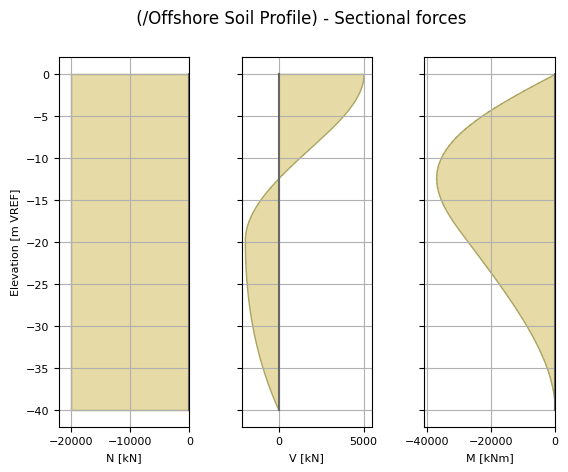

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(name = "",
        kind='Circular',
        material='Steel',
        top_elevation = 0,
        pile_sections={
            'length':[10,30],
            'diameter':[7.5,7.5],
            'wall thickness':[0.07, 0.08],
        }
    )

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name='medium dense sand',
            top=0,
            bottom=-20,
            weight=18,
            lateral_model= API_sand(phi=33, Neq=100)
        ),
        Layer(
            name='firm clay',
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model= API_clay(Su=[50, 70], eps50=0.015, Neq=100)
        ),
    ]
)

# Create Model 
M = Model.create(name="", pile=p, soil=sp)

# Apply bottom fixity along x-axis 
M.set_support(elevation=-40, Tx = True)
# Apply axial and lateral load
M.set_pointload(elevation=0,Px=-20e3, Py = 5e3)

# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot_forces()


In [4]:
M.py_springs

,Element no.,Position,Elevation [m],type,VAL 0,VAL 1,VAL 2,VAL 3,VAL 4,VAL 5,VAL 6,VAL 7,VAL 8,VAL 9,VAL 10,VAL 11,VAL 12,VAL 13,VAL 14
0,0,top,0.0,p,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,top,0.0,y,0.0,0.029669,0.059337,0.089006,0.118675,0.148344,0.178012,0.207681,0.237350,0.267019,0.296687,0.326356,0.356025,0.385694,0.415362
2,0,bottom,-0.5,p,0.0,24.511480,45.501713,61.218693,71.844231,78.540703,82.576035,84.942398,86.307945,87.088661,87.532639,87.784355,87.926826,88.007378,88.052902
3,0,bottom,-0.5,y,0.0,0.003456,0.006912,0.010368,0.013825,0.017281,0.020737,0.024193,0.027649,0.031105,0.034561,0.038018,0.041474,0.044930,0.048386
4,1,top,-0.5,p,0.0,24.511480,45.501713,61.218693,71.844231,78.540703,82.576035,84.942398,86.307945,87.088661,87.532639,87.784355,87.926826,88.007378,88.052902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,78,bottom,-39.5,y,0.0,0.028125,0.059062,0.281250,0.843750,1.298131,1.399318,1.925137,2.250000,2.265439,2.330382,3.005584,3.866909,4.218750,4.500000
316,79,top,-39.5,p,0.0,1240.989014,1585.259277,2381.313965,2653.187500,3123.507080,3812.571045,3812.630371,3812.630371,3812.630371,3812.630371,3812.630371,3812.630371,3812.630371,3812.630371
317,79,top,-39.5,y,0.0,0.028125,0.059062,0.202682,0.281250,0.461173,0.843750,1.166950,1.300045,2.250000,2.983078,3.588123,4.127696,4.218750,4.500000
318,79,bottom,-40.0,p,0.0,1257.038208,1605.760742,2687.500000,2912.381836,3861.877441,3861.937500,3861.937500,3861.937500,3861.937500,3861.937500,3861.937500,3861.937500,3861.937500,3861.937500


In [5]:
layer = Layer(name='Soft Clay',
                        top=-10,
                        bottom=0,
                        weight=19,
                        lateral_model=API_clay(Su=[30,35], eps50=[0.01, 0.02], Neq=100), 
                    )

Bottom elevation is higher than top elevation


ValidationError: 1 validation error for Layer
__root__
   (type=value_error)